In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
import keras
%matplotlib inline

In [33]:
df = pd.read_csv('train_E6oV3lV.csv')

In [34]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [35]:
X = df['tweet']
Y = df['label']
Y_org = Y

In [36]:
from keras.preprocessing.text import Tokenizer
max_features = 10000
tokenizer = Tokenizer(num_words=max_features, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', split=' ', lower=True, char_level=False, oov_token=None)
tokenizer.fit_on_texts(X.values)
X = tokenizer.texts_to_sequences(X.values)

# add padding
from keras.preprocessing.sequence import pad_sequences
X = pad_sequences(X, maxlen=400)

In [37]:
max(df['tweet'], key=len)

' @user lmfao pathetic #soit   #growup #funny #noonethere #iknowwhoitis ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98±ð\x9f\x98±ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98±ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82â\x80¦'

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit(X).transform(X)

/home/shivam/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [39]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 35)
pca.fit(X)
X = pca.transform(X);

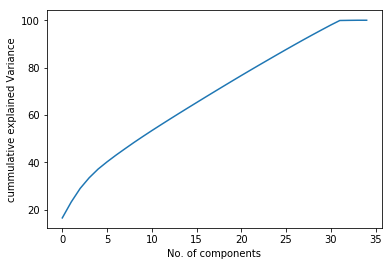

In [40]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel("No. of components")
plt.ylabel("cummulative explained Variance");

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state= 42)

In [42]:
X_train.shape[1]

35

In [43]:
from keras.models import Sequential 

In [44]:
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM

In [54]:
lstm_clf = Sequential()
lstm_clf.add(LSTM(units=40, activation='relu', input_shape=(None, 35), dropout=0.3, recurrent_dropout=0.3))
lstm_clf.add(Dense(20, activation='relu'))
lstm_clf.add(Dropout(rate=0.3))
lstm_clf.add(Dense(2, activation='softmax'))

In [63]:
classifier = Sequential()
classifier.add(LSTM(units=40, activation='relu',return_sequences= True, input_shape=(None, 35)))
classifier.add(Dropout(rate=0.3))

In [64]:
classifier.add(LSTM(units=20, return_sequences= True,activation='relu'))
classifier.add(Dropout(rate=0.2))
classifier.add(LSTM(units=20,activation='relu'))
classifier.add(Dropout(rate=0.2))
classifier.add(Dense(units = 2, activation='softmax'))

In [65]:
classifier.compile(optimizer='rmsprop',metrics=['accuracy'],loss='binary_crossentropy')

In [48]:
from sklearn.preprocessing import OneHotEncoder
y_e = OneHotEncoder()
Y_train_org = Y_train
Y_test_org = Y_test
Y_train = Y_train.reshape(-1, 1)
Y_test = Y_test.reshape(-1, 1)
y_e.fit(Y_train)
Y_train = y_e.transform(Y_train)
Y_test = y_e.transform(Y_test)

/home/shivam/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """
/home/shivam/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [49]:
Y_train

<25569x2 sparse matrix of type '<class 'numpy.float64'>'
	with 25569 stored elements in Compressed Sparse Row format>

In [50]:
Y_test

<6393x2 sparse matrix of type '<class 'numpy.float64'>'
	with 6393 stored elements in Compressed Sparse Row format>

In [70]:
X_train_lstm = np.reshape(X_train, (X_train.shape[0],1, X_train.shape[1]))
X_test_lstm = np.reshape(X_test, (X_test.shape[0],1 ,X_test.shape[1]))
checker = classifier.fit(X_train_lstm, Y_train, batch_size=32, epochs=20, validation_data = (X_test_lstm, Y_test))

Train on 25569 samples, validate on 6393 samples
Epoch 1/20
25569/25569 [==============================] - 12s 455us/step - loss: 0.2455 - acc: 0.9301 - val_loss: 0.2470 - val_acc: 0.9287
Epoch 2/20
25569/25569 [==============================] - 11s 421us/step - loss: 0.2458 - acc: 0.9301 - val_loss: 0.2493 - val_acc: 0.9287
Epoch 3/20
25569/25569 [==============================] - 11s 420us/step - loss: 0.2456 - acc: 0.9301 - val_loss: 0.2497 - val_acc: 0.9287
Epoch 4/20
25569/25569 [==============================] - 11s 427us/step - loss: 0.2456 - acc: 0.9301 - val_loss: 0.2529 - val_acc: 0.9287
Epoch 5/20
25569/25569 [==============================] - 11s 427us/step - loss: 0.2452 - acc: 0.9301 - val_loss: 0.2496 - val_acc: 0.9287
Epoch 6/20
25569/25569 [==============================] - 11s 431us/step - loss: 0.2459 - acc: 0.9301 - val_loss: 0.2475 - val_acc: 0.9287
Epoch 7/20
25569/25569 [==============================] - 12s 455us/step - loss: 0.2464 - acc: 0.9301 - val_loss: 0.2

In [72]:
Y_pred_test_label = classifier.predict(X_test_lstm)
y_pred_test=np.argmax(Y_pred_test_label,axis =1)
y_pred_test
Y_pred_train_label = classifier.predict(X_train_lstm)
y_pred_train = np.argmax(Y_pred_train_label,axis=1)
Y_test_true = Y_test_org.astype(np.int)
Y_train_true = Y_train_org.astype(np.int)

In [73]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_true,y_pred_test))

             precision    recall  f1-score   support

          0       0.93      1.00      0.96      5937
          1       0.00      0.00      0.00       456

avg / total       0.86      0.93      0.89      6393



/home/shivam/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [74]:
from sklearn.metrics import confusion_matrix

In [75]:
### for softmax function
print("TRAIN:  \n",confusion_matrix(y_pred_train,Y_train_true))
print("\nTest:  \n",confusion_matrix(y_pred_test,Y_test_true))

TRAIN:  
 [[23783  1786]
 [    0     0]]

Test:  
 [[5937  456]
 [   0    0]]
